getting my data

In [1]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()

In [2]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape,sep='\n')

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

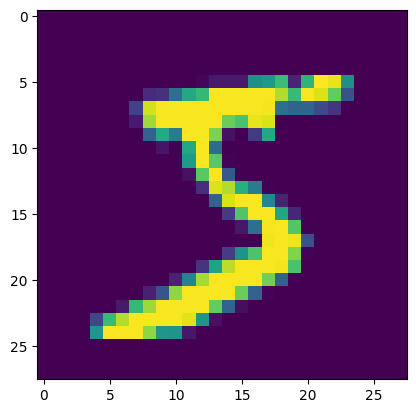

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# plt.imshow(x_train[0])

In [8]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(120,input_shape=(784,),activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 10)                850       
                                                                 
Total params: 105214 (410.99 KB)
Trainable params: 105214 (410.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics='accuracy')
res = model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
1875/1875 - 20s - loss: 0.2589 - accuracy: 0.9243 - val_loss: 0.1565 - val_accuracy: 0.9522 - 20s/epoch - 10ms/step
Epoch 2/30
1875/1875 - 14s - loss: 0.1193 - accuracy: 0.9636 - val_loss: 0.1050 - val_accuracy: 0.9684 - 14s/epoch - 7ms/step
Epoch 3/30
1875/1875 - 7s - loss: 0.0822 - accuracy: 0.9752 - val_loss: 0.0876 - val_accuracy: 0.9727 - 7s/epoch - 4ms/step
Epoch 4/30
1875/1875 - 7s - loss: 0.0593 - accuracy: 0.9815 - val_loss: 0.0802 - val_accuracy: 0.9748 - 7s/epoch - 4ms/step
Epoch 5/30
1875/1875 - 5s - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0761 - val_accuracy: 0.9764 - 5s/epoch - 3ms/step
Epoch 6/30
1875/1875 - 6s - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.1019 - val_accuracy: 0.9677 - 6s/epoch - 3ms/step
Epoch 7/30
1875/1875 - 6s - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.0800 - val_accuracy: 0.9765 - 6s/epoch - 3ms/step
Epoch 8/30
1875/1875 - 6s - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0919 - val_accuracy: 0.9734 - 6s/epoch - 3ms/step
Epo

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               94200     
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dense_2 (Dense)             (None, 10)                850       
                                                                 
Total params: 105214 (410.99 KB)
Trainable params: 105214 (410.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
print("first loss: ",res.history['loss'][0],"\n","last loss:  ",res.history['loss'][-1],sep='')

first loss: 0.25885123014450073
last loss:  0.0047985524870455265


In [13]:
yp = model.predict(x_test)
loss,acc =model.evaluate(x_train,y_train)
print("Train accuracy:",round(acc*100,2),'%')

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0035 - accuracy: 0.9988
Train accuracy: 99.88 %


Test accuracy

In [14]:
loss2,acc2 =model.evaluate(x_test,y_test)
print("Test accuracy:",round(acc2*100,2),'%')

313/313 [==============================] - 1s 3ms/step - loss: 0.1135 - accuracy: 0.9764
Test accuracy: 97.64 %


In [15]:
# res.history

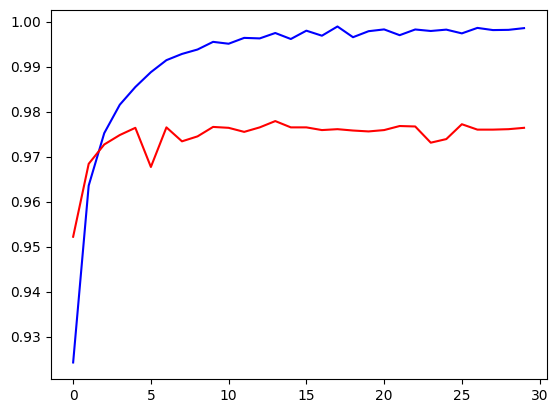

In [16]:
import matplotlib.pyplot as plt
plt.plot(res.history['accuracy'],label='accuracy',color='blue')
plt.plot(res.history["val_accuracy"],label='test_accuracy',color='r')



In [17]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
from keras.models import load_model
m = load_model('/content/drive/MyDrive/model.h5')
L , A = m.evaluate(x_test,y_test)
A

313/313 [==============================] - 1s 2ms/step - loss: 0.1180 - accuracy: 0.9778


0.9778000116348267

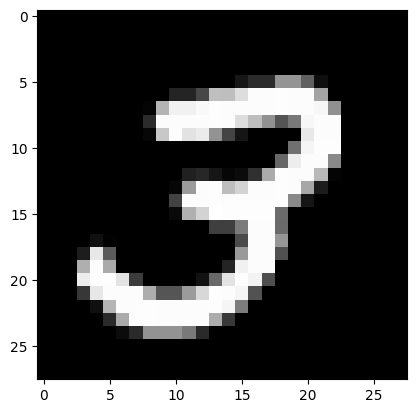

In [22]:
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/3_test.png',target_size=(28,28))
plt.imshow(img)

In [23]:
img.size

(28, 28)

In [24]:
img = img.convert('L')

In [25]:
img=img_to_array(img)
img.shape

(28, 28, 1)

In [26]:
img=img/255

In [27]:
x_train[0].shape

(784,)

In [28]:
img = img.reshape(x_train[0].shape)
img.shape

(784,)

In [29]:
from numpy import argmax
from sklearn.metrics import confusion_matrix
yp1 = argmax(yp,axis=1)

In [30]:
print(confusion_matrix(y_test,yp1))

[[ 970    0    2    1    1    2    0    1    1    2]
 [   0 1121    3    3    0    1    3    1    3    0]
 [   6    1 1009    2    1    0    1    8    4    0]
 [   0    0    5  987    1    3    0    4    3    7]
 [   1    0    3    0  964    1    3    2    0    8]
 [   2    0    0   10    0  871    4    1    2    2]
 [   4    3    2    2    5    5  934    0    3    0]
 [   1    5    7    2    2    0    0 1001    4    6]
 [   1    1    3   12    6    9    2    6  928    6]
 [   2    2    0    3   13    5    1    3    1  979]]


In [33]:
# m = load_model('/content/drive/MyDrive/model.h5')
# p = m.predict(img)
# p